In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

let us clean our data

In [ ]:
df = pd.read_csv('./dataset/adult.csv', na_values='?') #impoterd the given dataset
# print(df.to_string())
df_cleaned = df.dropna() #drop missing data
print(df_cleaned.to_string()) #now we are clearly able to see the data

       age         workclass   fnlwgt     education  education.num         marital.status         occupation    relationship                race     sex  capital.gain  capital.loss  hours.per.week              native.country income
1       82           Private   132870       HS-grad              9                Widowed    Exec-managerial   Not-in-family               White  Female             0          4356              18               United-States  <=50K
3       54           Private   140359       7th-8th              4               Divorced  Machine-op-inspct       Unmarried               White  Female             0          3900              40               United-States  <=50K
4       41           Private   264663  Some-college             10              Separated     Prof-specialty       Own-child               White  Female             0          3900              40               United-States  <=50K
5       34           Private   216864       HS-grad              9      

now let us plot the graphs and derive information

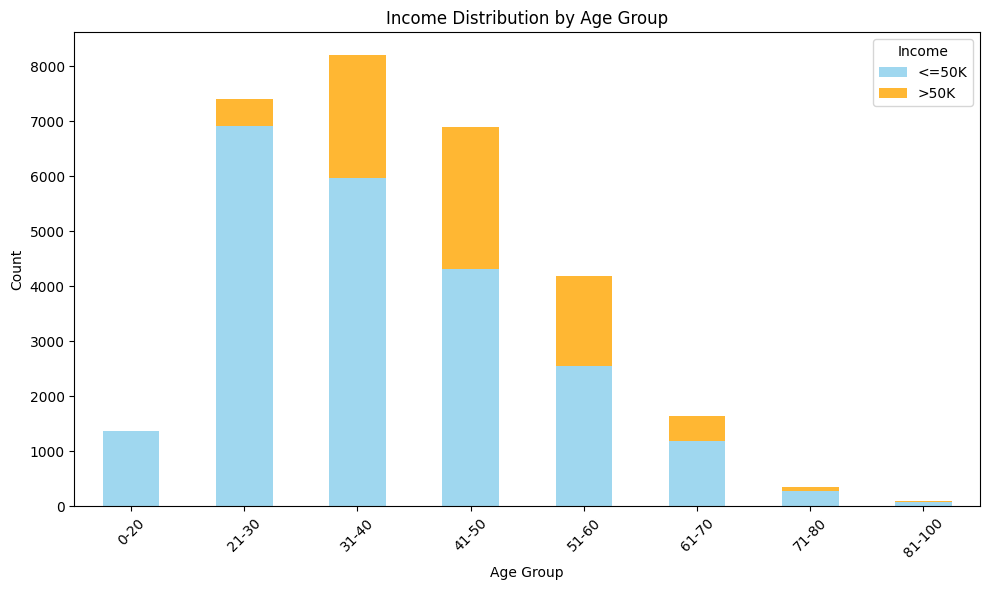

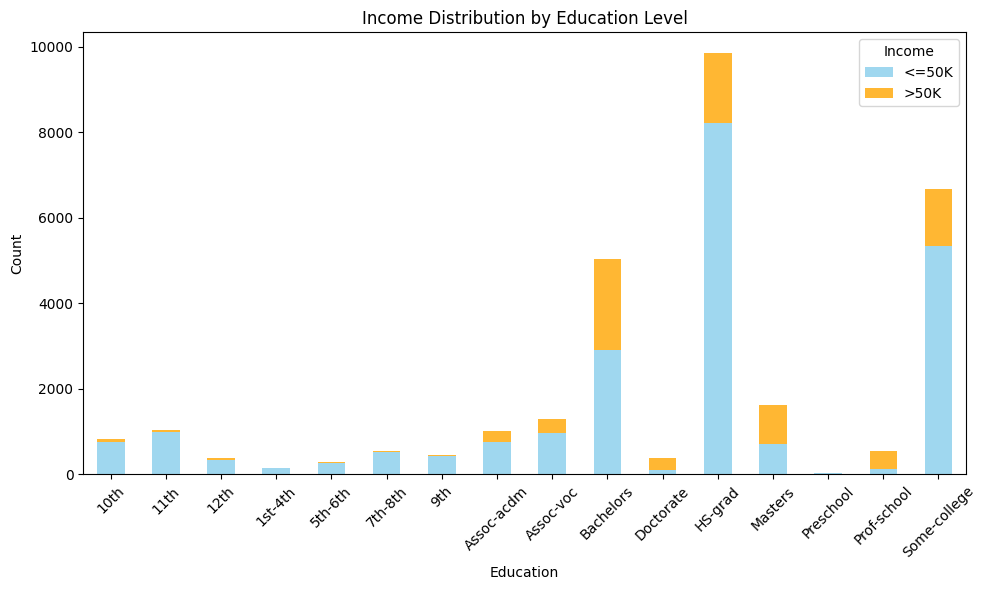

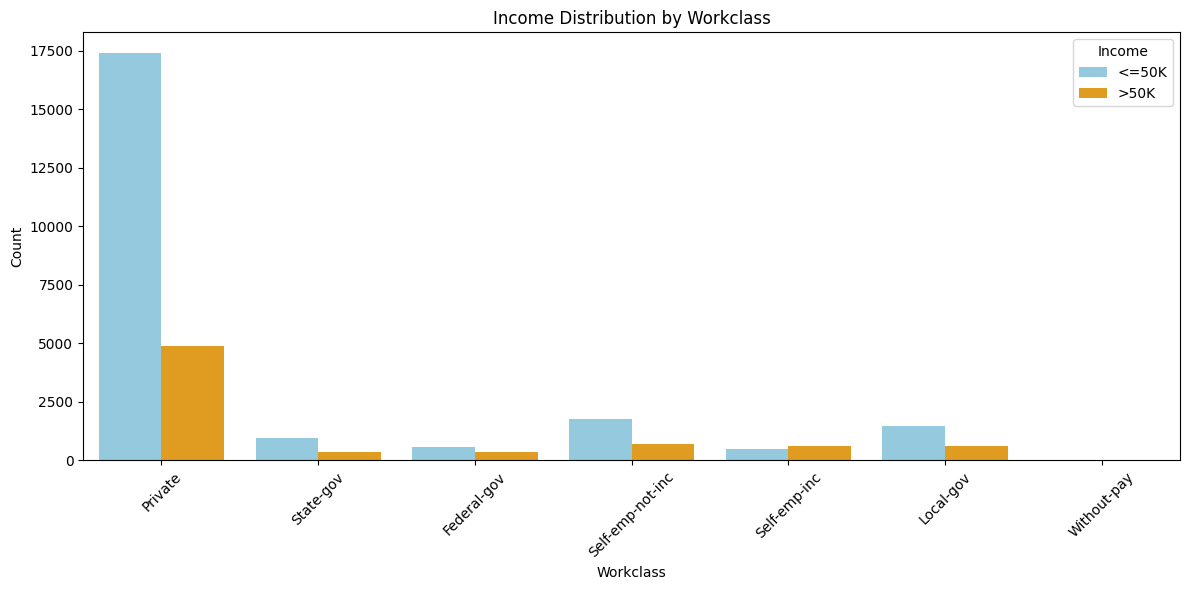

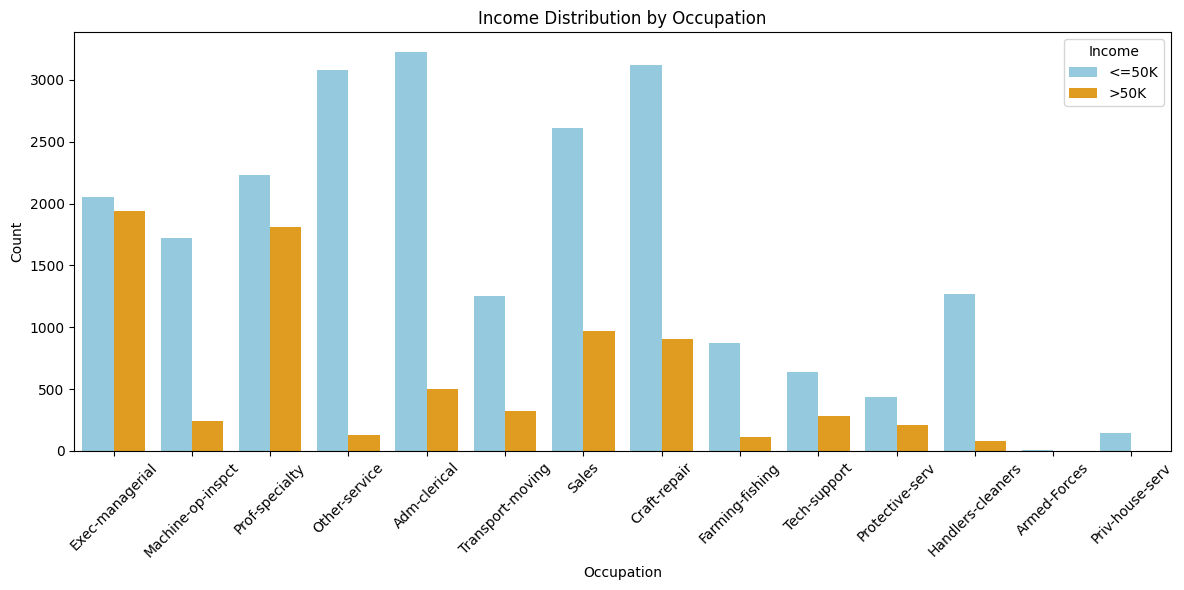

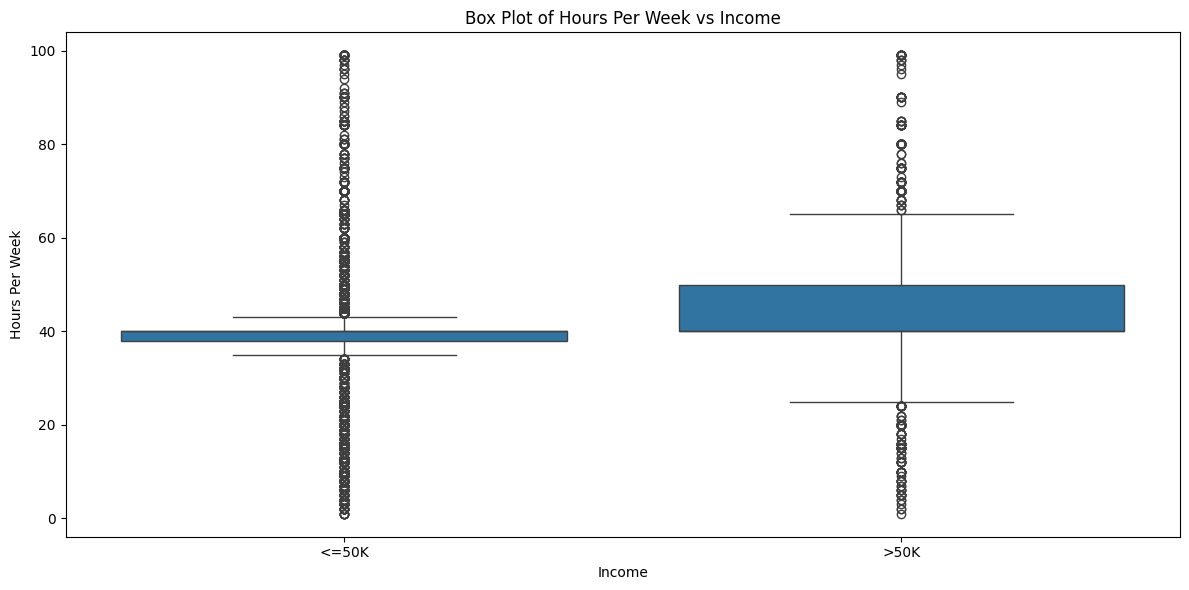

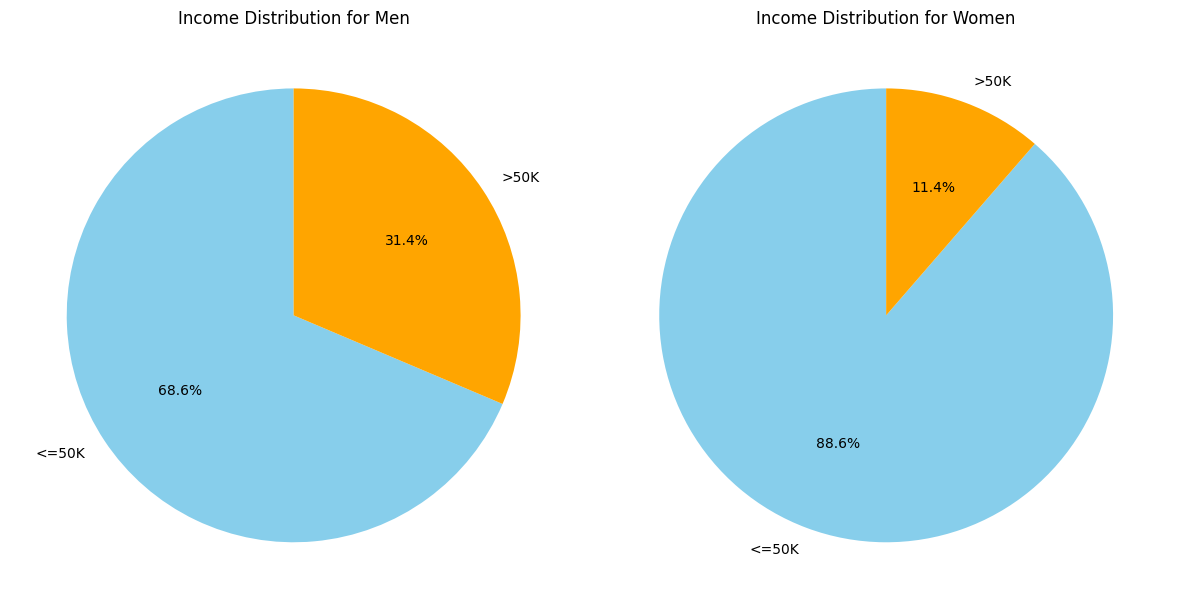

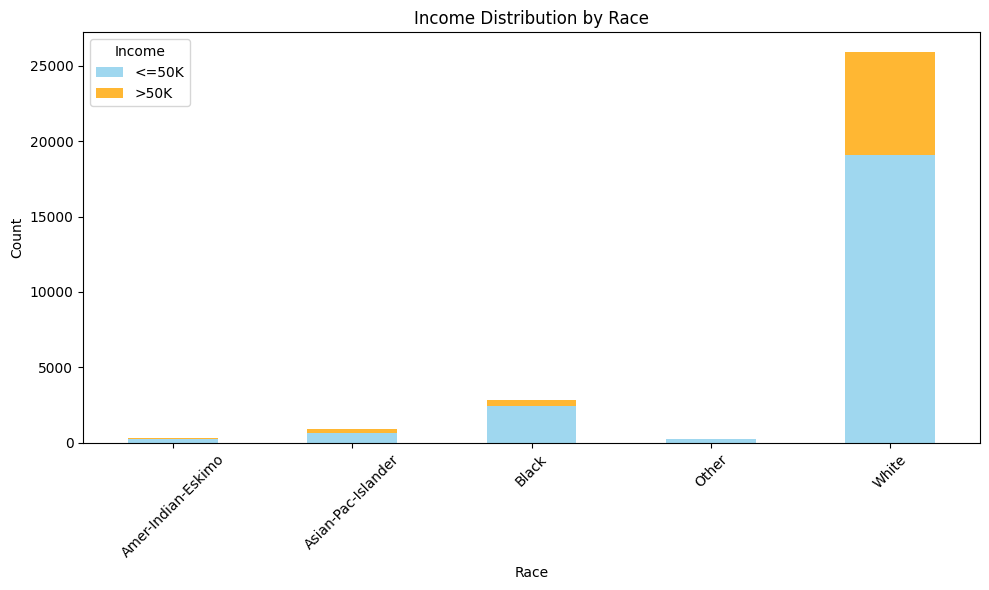

KeyError: '>50K'

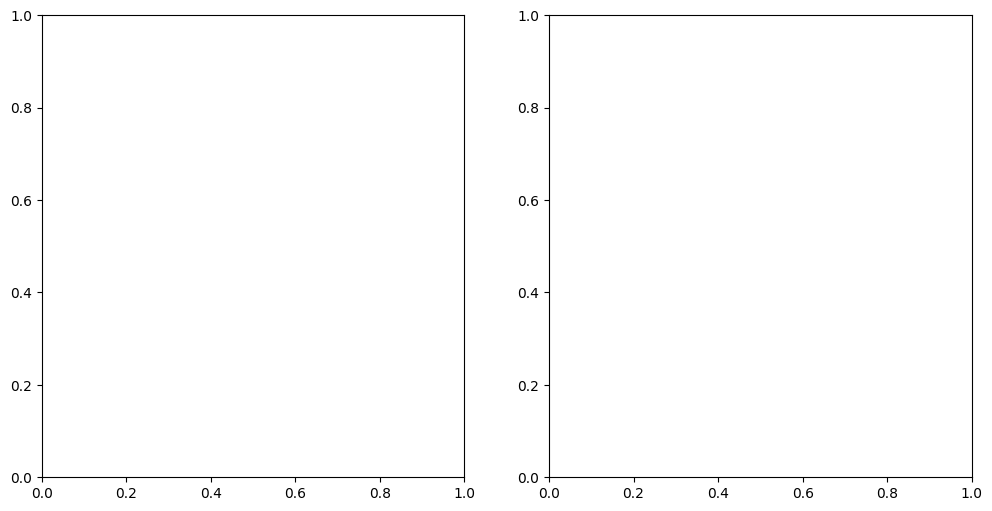

In [ ]:
# Stacked bar plot of income distribution by age group
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
df_cleaned.loc[:, 'age_group'] = pd.cut(df_cleaned['age'], bins=age_bins, labels=age_labels, right=False)
#we used .loc to avoid SettingWithCopyWarning
income_age_counts = pd.crosstab(df_cleaned['age_group'], df_cleaned['income'])
income_age_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'orange'],
    alpha=0.8)
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['<=50K', '>50K'], title='Income')
plt.xticks(rotation=45)  # We Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Stacked bar plot of income distribution by education level
income_education_counts = pd.crosstab(df_cleaned['education'], df_cleaned['income'])
income_education_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'orange'],
    alpha=0.8)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(['<=50K', '>50K'], title='Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Grouped bar plot of workclass with count of income group
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='workclass', hue='income', palette=['skyblue', 'orange'])
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


# Grouped bar plot of occupation with count of income group
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='occupation', hue='income', palette=['skyblue', 'orange'])
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Box plot: Hours-per-week vs Income
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='income', y='hours.per.week')
plt.title('Box Plot of Hours Per Week vs Income')
plt.xlabel('Income')
plt.ylabel('Hours Per Week')
plt.xticks([0, 1], ['<=50K', '>50K'])  # Rename x-axis labels for clarity
plt.tight_layout()
plt.show()


# Pie charts for income distribution by gender
gender_income_counts = pd.crosstab(df_cleaned['sex'], df_cleaned['income'])
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Pie chart for Men
axes[0].pie(
    gender_income_counts.loc['Male'],
    labels=['<=50K', '>50K'],
    autopct='%1.1f%%',
    colors=['skyblue', 'orange'],
    startangle=90)
axes[0].set_title('Income Distribution for Men')
# Pie chart for Women
axes[1].pie(
    gender_income_counts.loc['Female'],
    labels=['<=50K', '>50K'],
    autopct='%1.1f%%',
    colors=['skyblue', 'orange'],
    startangle=90)
axes[1].set_title('Income Distribution for Women')
plt.tight_layout()
plt.show()


# Stacked bar plot of income distribution by race
race_income_counts = pd.crosstab(df_cleaned['race'], df_cleaned['income'])
race_income_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'orange'],
    alpha=0.8
)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(['<=50K', '>50K'], title='Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()